# Marketing do Banco

Com o dataset escolhido, pretende-se analisar um conjunto de dados onde se identifica conhecimento sobre as campanhas
promocionais realizadas por um banco em que se pretende prever a adesão dos clientes após o
contacto promocional.


## O dataset contem 45211 casos e 17 features. 

### Input features (bank client data)
 - age - (numeric) 
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'tertiary' 'secondary' 'unknown' 'primary')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - balance: Balance the client possesses
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')
 - contact: contact communication type (categorical: 'cellular','telephone')
 - day: last contact day (numeric)
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown', 'other','success')

## Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')
 
### Disponível em : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Organização do dataset
O dataset está no formato CSV. Contudo, o separador das colunas 'e o ';'.

In [2]:
bank = pd.read_csv('bank-full.csv', sep=';')

## Exploração dos dados

Vista básica do dataset, inicial.

In [3]:
bank.shape

(45211, 17)

In [4]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Missing Values

Verifica-se que no dataset não existem valores perdidos.

In [7]:
bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [8]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Valores Duplicados

O dataset não tem qualquer valor duplicado.
Tratamento para caso tenha (drop).

In [10]:
print(bank.duplicated().sum())
print(bank.drop_duplicates(inplace=True))
print(bank.info())

0
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB
None


### Análise do heatmap

<AxesSubplot:>

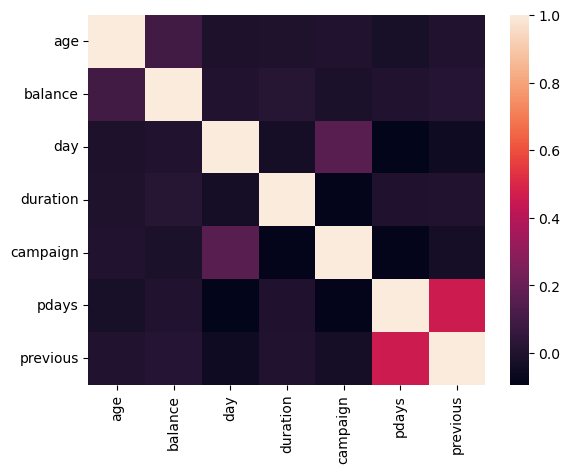

In [11]:
sns.heatmap(bank.corr())

## Analisar a correspondência entre o target output e os atributos categóricos

 - 1) Analisar o target com o número de ocorrências no dataset;
 - 2) Analisar o target com o trabalho do cliente;
 - 3) Analisar o target com o estado civil do cliente;
 - 4) Analisar o target com o tipo de contacto do cliente;
 - 5) Analisar o target com o resultado da campanha anterior;
 - 6) Analisar o target com o nível de educação do cliente;
 - 7) Analisar o target com o mês onde a campanha foi efetuada;
 - 8) Analisar o target com o estado do crédito;
 - 9) Analisar o target com o empr imobiliário do cliente;
 - 10) Analisar o target com o facto do cliente ter ou não um empréstimo;

<AxesSubplot:title={'center':'Subscreveu ou não a um depósito'}>

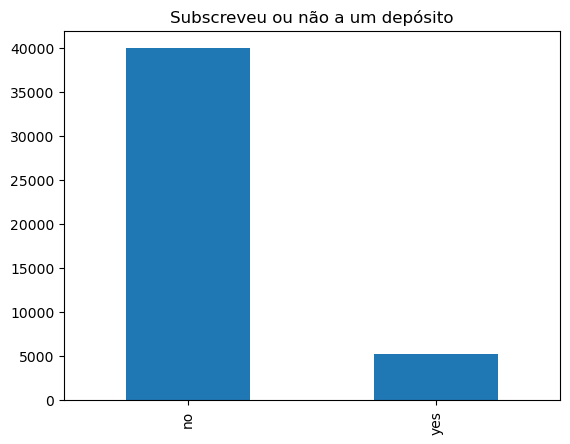

In [12]:
y_count = bank['y'].value_counts()
y_count.plot.bar(title = 'Subscreveu ou não a um depósito')

<AxesSubplot:title={'center':'Trabalho e target output'}>

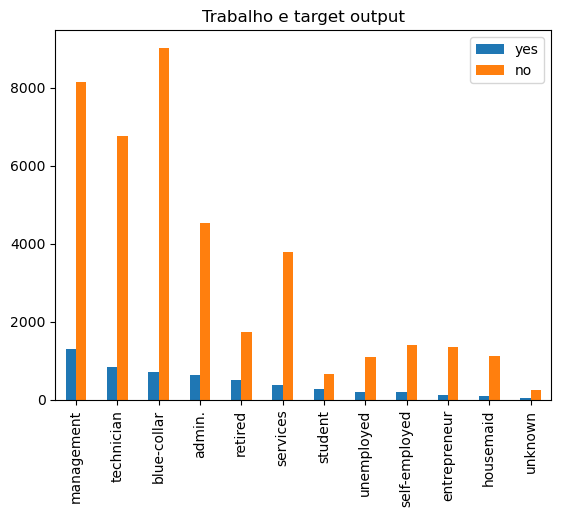

In [13]:
job_target = pd.DataFrame()

job_target['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
job_target['no'] = bank[bank['y'] == 'no']['job'].value_counts()

job_target.plot.bar(title = 'Trabalho e target output')

<AxesSubplot:title={'center':'Estado Civil e target output'}>

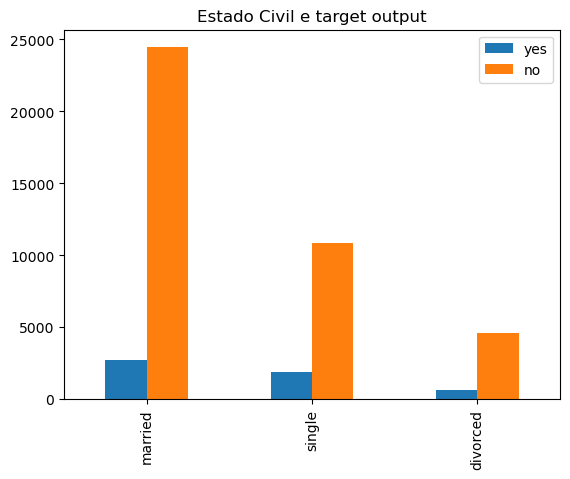

In [14]:
marital_target = pd.DataFrame()

marital_target['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
marital_target['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

marital_target.plot.bar(title = 'Estado Civil e target output')

<AxesSubplot:title={'center':'Tipo de contacto e target output'}>

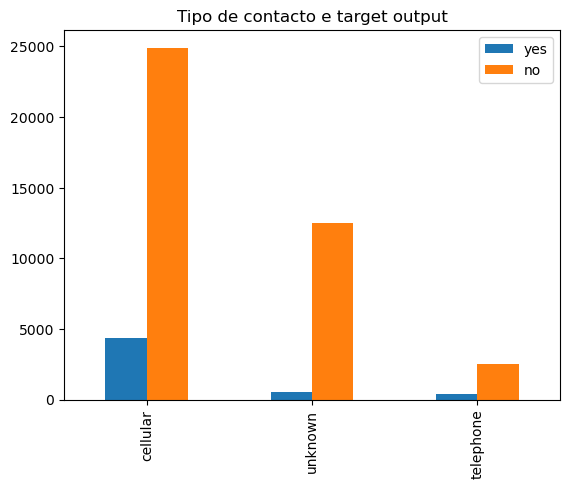

In [15]:
contact_target = pd.DataFrame()

contact_target['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
contact_target['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

contact_target.plot.bar(title = 'Tipo de contacto e target output')

<AxesSubplot:title={'center':'Resultado da campanha anterior e target output'}>

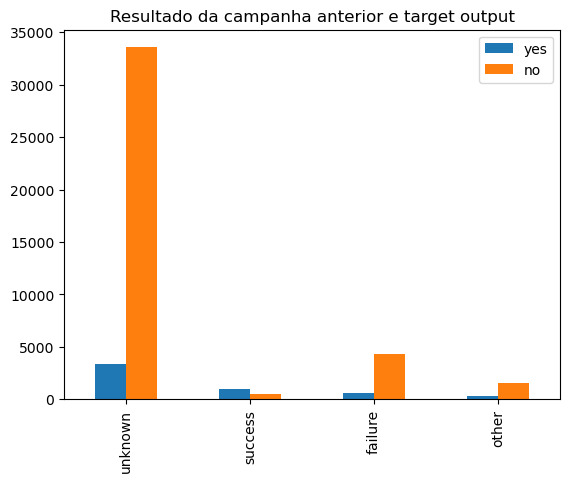

In [16]:
poutcome_target = pd.DataFrame()

poutcome_target['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
poutcome_target['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()

poutcome_target.plot.bar(title = 'Resultado da campanha anterior e target output')

<AxesSubplot:title={'center':'Nível da educação e target output'}>

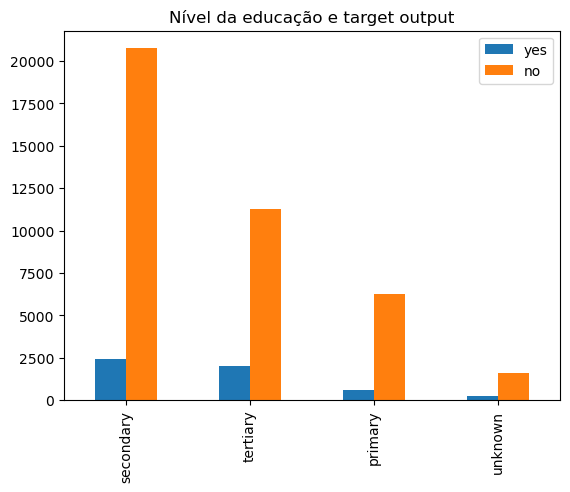

In [17]:
edu_target = pd.DataFrame()

edu_target['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
edu_target['no'] = bank[bank['y'] == 'no']['education'].value_counts()

edu_target.plot.bar(title = 'Nível da educação e target output')

<AxesSubplot:title={'center':'Mês e target output'}>

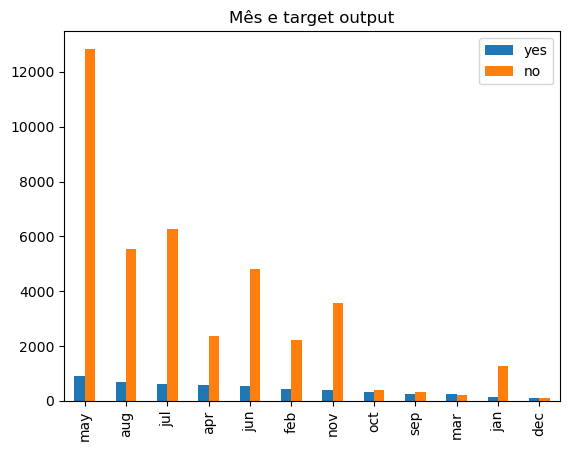

In [18]:
mon_target = pd.DataFrame()

mon_target['yes'] = bank[bank['y'] == 'yes']['month'].value_counts()
mon_target['no'] = bank[bank['y'] == 'no']['month'].value_counts()

mon_target.plot.bar(title = 'Mês e target output')

<AxesSubplot:title={'center':'Crédito por default e target output'}>

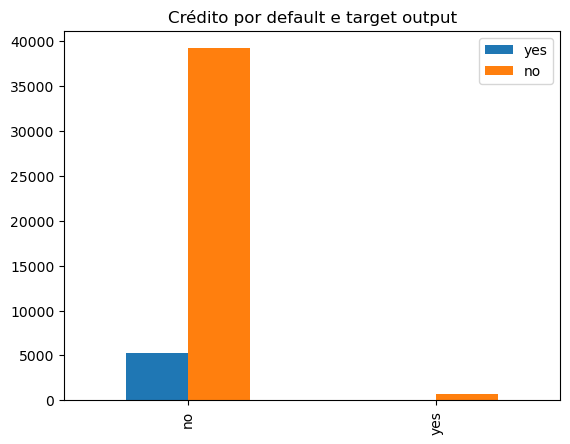

In [19]:
def_target = pd.DataFrame()

def_target['yes'] = bank[bank['y'] == 'yes']['default'].value_counts()
def_target['no'] = bank[bank['y'] == 'no']['default'].value_counts()

def_target.plot.bar(title = 'Crédito por default e target output')

<AxesSubplot:title={'center':'Empréstimo imobiliário e target output'}>

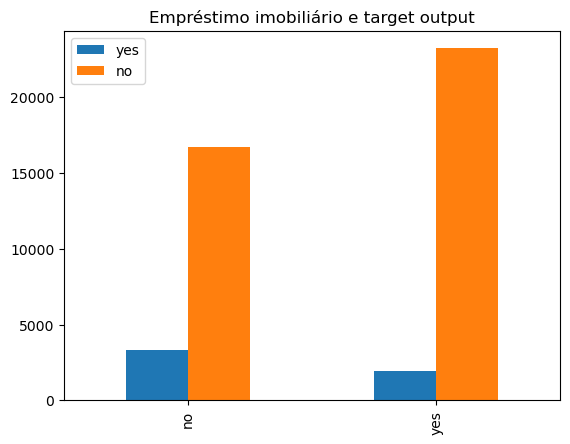

In [20]:
hou_target = pd.DataFrame()

hou_target['yes'] = bank[bank['y'] == 'yes']['housing'].value_counts()
hou_target['no'] = bank[bank['y'] == 'no']['housing'].value_counts()

hou_target.plot.bar(title = 'Empréstimo imobiliário e target output')

<AxesSubplot:title={'center':'Estado do empréstimo e target output'}>

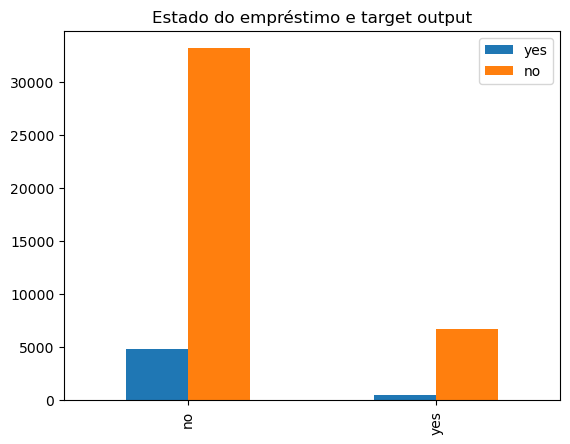

In [21]:
loan_target = pd.DataFrame()

loan_target['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
loan_target['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

loan_target.plot.bar(title = 'Estado do empréstimo e target output')

## Preparação dos Dados

### Valores categóricos binários 'yes' ou 'no'

Transformar em valores numéricos (aplicar label encoding):
 - yes (target)
 - default
 - housing
 - loan

In [22]:
bank['y'] = np.where(bank['y'] == "yes", 1, 0)
bank['default'] = np.where(bank['default'] == "yes", 1, 0)
bank['housing'] = np.where(bank['housing'] == "yes", 1, 0)
bank['loan'] = np.where(bank['loan'] == "yes", 1, 0)

### Atributo 'month'

Através de label encoding, dado aos meses terem uma ordem explícita, pelos quais estão organizados.
Verificou-se em cima que em março a percentagem de aceitação do depósito é maior.

In [23]:
map_month = {'month' : {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}}
bank.replace(map_month, inplace=True)

### Atributo 'pdays'

Para este atributo "-1" simboliza que o cliente não foi contactado ou que não informação sobre esse dados.
No entanto, mais de 75% dos dados da coluna,m então será melhor retirá-la; dado a ser muito inconsistente.

In [24]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [25]:
bank['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [26]:
bank.drop('pdays', axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,0,unknown,0


### Atributo 'poutcome'

Observa-se que tem dois atributos - 'unknown' e 'other'.
O valor 'unknown' não traz informação adicional, pelo que justifica-se 
inseri-lo dentro do valor 'other'.
Apesar de não terem exatamente o mesmo significado, no contexto do problema, simbolizam o mesmo.

Adicionalmente, com label encoding, alteramos:
 - success -> 1
 - failure -> 0
 - other   -> -1
 
 ...uma vez que existe uma ordem implícita, desde exceção, sucesso e falha.
 Apesar da maioria esmagadora encontrar-se no other, temos pela observação do gráfico em cima que, quando é sucesso,
 a probabilidade de fazer um depósito é maior.

In [27]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [28]:
map_poutcome = { 'poutcome' : {'unknown' : 'other' }}
bank.replace(map_poutcome, inplace=True)

In [29]:
bank['poutcome'].value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [30]:
map_poutcome = { 'poutcome' : {'other' : -1 , 'success' : 1 , 'failure' : 0}}
bank.replace(map_poutcome, inplace=True)

### Atributo 'balance'

Conseguimos visuaizar pela boxplot, que o atributo balance tem um elevado número
de outliers, nomeadamente no seu upper bound.

Deste modo, o seu tratamento vai divergir.

Definiu-se que se o número de outliers fosse inferior a 5%, procedia-se à remoção das respetivas linhas, caso contrário escolhia-se a melhor opção (neste caso para valores numéricos).

Como os valores no lower bound correspondem a menos de 5% dos dados, na totalidade, 
procede-se à sua remoção. São na totalidade 1962 correspondências.

Por outro lado, no upper bound, os outliers correspondem a 10% da totalidade dos dados; 
Neste caso, escolheu-se a transformação com log (Log Transformation) uma vez que o atributo tem valores muito enviesados.
Neste caso, os valores vão ser aproximados ao normal; dentro das possibilidades.

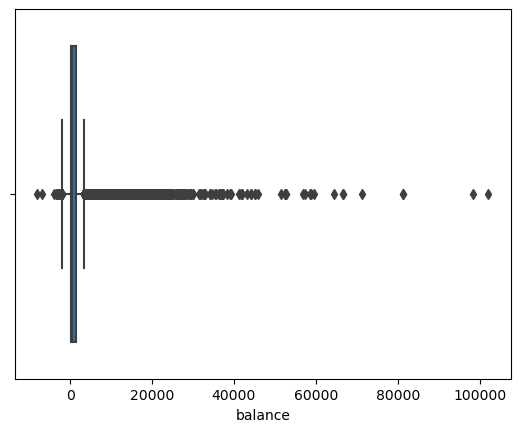

In [31]:
sns.boxplot(x = bank['balance'])
plt.show()

Obter o valore do lower e upper bound da feature balance.

In [32]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lowerLim = Q1 - 1.5 * IQR
upperLim = Q3 + 1.5 * IQR

print(lowerLim)
print(upperLim)

1356.0
-1962.0
3462.0


Obter o número de valores no upper e lower bound.

In [33]:
print(bank[bank['balance'] < lowerLim].count())

age          17
job          17
marital      17
education    17
default      17
balance      17
housing      17
loan         17
contact      17
day          17
month        17
duration     17
campaign     17
pdays        17
previous     17
poutcome     17
y            17
dtype: int64


In [34]:
print(bank[bank['balance'] > upperLim].count())

age          4712
job          4712
marital      4712
education    4712
default      4712
balance      4712
housing      4712
loan         4712
contact      4712
day          4712
month        4712
duration     4712
campaign     4712
pdays        4712
previous     4712
poutcome     4712
y            4712
dtype: int64


In [35]:
bank = bank.drop(bank.loc[bank['balance'] < lowerLim].index)
bank.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='balance'>

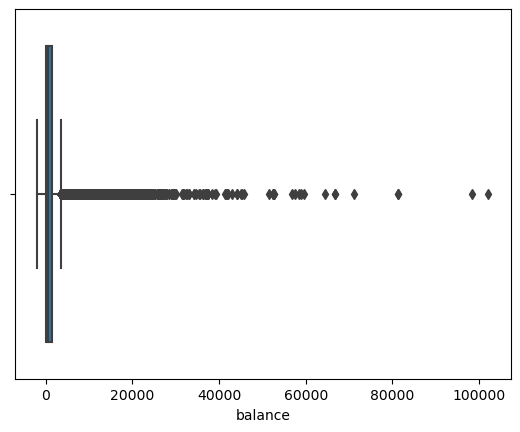

In [36]:
sns.boxplot(x = bank['balance'])

In [37]:
bank['balance'].mask(bank['balance'] > upperLim, upperLim, inplace=True)

<AxesSubplot:xlabel='balance'>

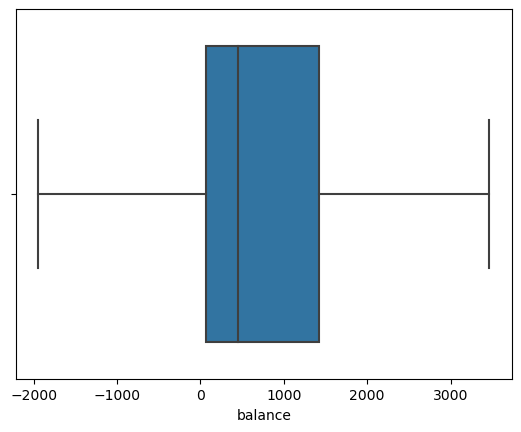

In [38]:
sns.boxplot(x = bank['balance'])

In [39]:
scaler = MinMaxScaler(feature_range=(-1,1))
bank['balance'] = scaler.fit_transform(bank[['balance']])

### Atributo 'previous'

Após uma breve análise do atributo previous, interpretou-se que o valor 0 tem um significado
especial em relação aos demais valores. 

Para além disso, existe uma grande discrepância nos
valores ̸= 0, levando à existência de bastantes outliers. 

Assim, optou-se por substituir como:
previous = 0 => "0"
previous > 0 => "1"
Permitindo categorizar entre: nunca ter recebido contacto ou já ter recebido, levando à manutenção da precisão global.

Ou seja, proceder a uma normalização dos dados.

In [40]:
bank['previous'].mask(bank['previous'] > 0, 1, inplace=True)
print(bank['previous'])

0        0
1        0
2        0
3        0
4        0
        ..
45189    0
45190    0
45191    1
45192    0
45193    1
Name: previous, Length: 45194, dtype: int64


### Atributo 'age'

A análise da idade foi efetuado com recurso à construção de um scatter plot com o número de
ocorrências de cada idade. 

Pode-se visualizar que a distribução é pouco uniforme, com
maior ênfase na idade entre os 31 e 60 anos. 

Assim, para homogeneizar a amostra procedemos ao binning dos dados;
Neste caso, com 4 bins.


In [41]:
age_counts = bank['age'].value_counts()
bank['age_count'] = bank['age'].map(age_counts)
print(bank['age_count'])

0         740
1        1136
2        1972
3        1088
4        1972
         ... 
45189     934
45190      54
45191      52
45192     827
45193    1696
Name: age_count, Length: 45194, dtype: int64


<AxesSubplot:xlabel='age', ylabel='age_count'>

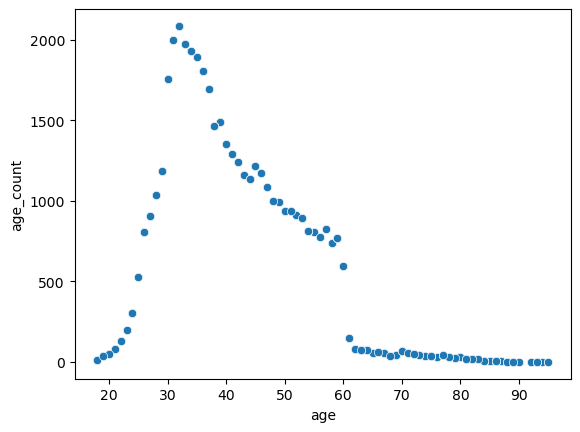

In [42]:
sns.scatterplot(data=bank, x="age", y="age_count")

In [43]:
bank = bank.drop('age_count', axis=1)

In [44]:
estimator = preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
bank['age_binned'] = estimator.fit_transform(bank[['age']])

print('Bin Edges')
print(estimator.bin_edges_[0])
print('Age groups')
print (bank.groupby(by=['age_binned']).count())

Bin Edges
[18. 33. 39. 48. 95.]
Age groups
              age    job  marital  education  default  balance  housing  \
age_binned                                                                
0.0         11110  11110    11110      11110    11110    11110    11110   
1.0         10762  10762    10762      10762    10762    10762    10762   
2.0         11147  11147    11147      11147    11147    11147    11147   
3.0         12175  12175    12175      12175    12175    12175    12175   

             loan  contact    day  month  duration  campaign  pdays  previous  \
age_binned                                                                      
0.0         11110    11110  11110  11110     11110     11110  11110     11110   
1.0         10762    10762  10762  10762     10762     10762  10762     10762   
2.0         11147    11147  11147  11147     11147     11147  11147     11147   
3.0         12175    12175  12175  12175     12175     12175  12175     12175   

            poutcom

### Atributo 'education'

Neste caso, será feito label enconding, por existir uma ordem explícita, com a exceção do caso unknown.
Este último representa uma pequena parte do dataset, pelo que será removido.

In [45]:
bank['education'].value_counts()

secondary    23198
tertiary     13290
primary       6849
unknown       1857
Name: education, dtype: int64

In [46]:
bank.drop(bank[bank['education'] == "unknown"].index, inplace=True)

In [47]:
map_education = { 'education' : {'primary' : 1, 'secondary' : 2, 'tertiary' : 3 }}
bank.replace(map_education, inplace=True)
print(bank)

       age           job   marital  education  default   balance  housing  \
0       58    management   married          3        0  0.512024        1   
1       44    technician    single          2        0 -0.270070        1   
2       33  entrepreneur   married          2        0 -0.280059        1   
5       35    management   married          3        0 -0.195339        1   
6       28    management    single          3        0 -0.115427        1   
...    ...           ...       ...        ...      ...       ...      ...   
45189   51    technician   married          3        0  0.024417        0   
45190   71       retired  divorced          1        0  0.358861        0   
45191   72       retired   married          2        0  1.000000        0   
45192   57   blue-collar   married          2        0 -0.033666        0   
45193   37  entrepreneur   married          2        0  0.818350        0   

       loan    contact  day  month  duration  campaign  pdays  previous  \


### Atributo 'job' , 'marital' , 'contact'

#### 1) Atributo 'job' 
 - Remover os valores não conhecidos ('unknown').
 - Utilizar one-hot encoding para os restantes.

#### 2) Atributo 'marital'
 - Utilizar one-hot-encoding.

#### 3) Atributo 'contact'
 - Utilizar one-hot-encoding.

In [48]:
bank.drop(bank[bank['job'] == 'unknown'].index, inplace=True)
bank.reset_index(drop=True, inplace=True)
bank_data = bank.copy()

lb = LabelBinarizer()
lb_results = lb.fit_transform(bank_data['job'])
lb_results_bank = pd.DataFrame(lb_results, columns=lb.classes_)
bank = pd.concat([bank_data, lb_results_bank], axis=1)
bank = bank.drop('job', axis=1)

In [49]:
bank_data = bank.copy()

lb_results = lb.fit_transform(bank_data['marital'])
lb_results_bank = pd.DataFrame(lb_results, columns=lb.classes_)
bank = pd.concat([bank_data, lb_results_bank], axis=1)
bank = bank.drop('marital', axis=1)

In [50]:
bank_data = bank.copy()

lb_results = lb.fit_transform(bank_data['contact'])
lb_results_bank = pd.DataFrame(lb_results, columns=lb.classes_)
bank = pd.concat([bank_data, lb_results_bank], axis=1)
bank = bank.drop('contact', axis=1)

In [51]:
bank

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,services,student,technician,unemployed,divorced,married,single,cellular,telephone,unknown
0,58,3,0,0.512024,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,-0.270070,1,0,5,5,151,1,...,0,0,1,0,0,0,1,0,0,1
2,33,2,0,-0.280059,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,35,3,0,-0.195339,1,0,5,5,139,1,...,0,0,0,0,0,1,0,0,0,1
4,28,3,0,-0.115427,1,1,5,5,217,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,51,3,0,0.024417,0,0,17,11,977,3,...,0,0,1,0,0,1,0,1,0,0
43172,71,1,0,0.358861,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
43173,72,2,0,1.000000,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
43174,57,2,0,-0.033666,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0


#### O target output "y" tem correlação alta com o atributo duration.

In [52]:
bankCorr = bank.corr()
bankCorr

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,services,student,technician,unemployed,divorced,married,single,cellular,telephone,unknown
age,1.000000,-0.167362,-0.016963,0.120636,-0.185282,-0.010188,-0.008527,0.094157,-0.004875,0.004010,...,-0.065403,-0.185959,-0.068453,0.002686,0.169083,0.280409,-0.425250,-0.060325,0.162438,-0.023431
education,-0.167362,1.000000,-0.013013,0.069470,-0.080603,-0.028616,0.025884,0.073590,0.002342,0.004210,...,-0.088918,0.016575,0.065786,-0.032611,-0.003773,-0.147634,0.163209,0.164464,-0.070657,-0.135633
default,-0.016963,-0.013013,1.000000,-0.120277,-0.009047,0.074461,0.008217,0.015515,-0.011176,0.016867,...,0.000200,-0.014307,-0.002631,0.007422,0.017471,-0.014038,0.002827,-0.009143,-0.017489,0.019020
balance,0.120636,0.069470,-0.120277,1.000000,-0.076713,-0.117762,0.008578,0.106781,0.040370,-0.031722,...,-0.048656,0.008735,-0.016419,0.012485,-0.035396,0.036312,-0.014285,0.023055,0.048351,-0.050241
housing,-0.185282,-0.080603,-0.009047,-0.076713,1.000000,0.036930,-0.029856,-0.175659,0.003929,-0.025535,...,0.069848,-0.070616,-0.020184,-0.051159,-0.001555,0.018240,-0.018725,-0.160316,-0.078072,0.210981
loan,-0.010188,-0.028616,0.074461,-0.117762,0.036930,1.000000,0.011092,0.019934,-0.013408,0.010495,...,0.034738,-0.055244,0.012559,-0.037064,0.015513,0.038010,-0.052371,0.009407,-0.009959,-0.004586
day,-0.008527,0.025884,0.008217,0.008578,-0.029856,0.011092,1.000000,0.105972,-0.030170,0.164988,...,-0.010258,-0.012179,0.032539,-0.006583,-0.000035,0.006156,-0.006669,0.017683,0.021582,-0.030224
month,0.094157,0.073590,0.015515,0.106781,-0.175659,0.019934,0.105972,1.000000,-0.013266,0.055844,...,-0.042933,-0.019201,0.040763,-0.040990,-0.000537,0.062601,-0.067684,0.153977,0.039765,-0.183759
duration,-0.004875,0.002342,-0.011176,0.040370,0.003929,-0.013408,-0.030170,-0.013266,1.000000,-0.083109,...,0.000790,-0.004817,-0.009496,0.019095,0.004626,-0.022240,0.020889,0.024428,-0.023492,-0.013178
campaign,0.004010,0.004210,0.016867,-0.031722,-0.025535,0.010495,0.164988,0.055844,-0.083109,1.000000,...,-0.006543,-0.020813,0.023086,-0.020186,-0.015875,0.030427,-0.021783,-0.029961,0.052293,0.003578


In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43176 entries, 0 to 43175
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            43176 non-null  int64  
 1   education      43176 non-null  int64  
 2   default        43176 non-null  int64  
 3   balance        43176 non-null  float64
 4   housing        43176 non-null  int64  
 5   loan           43176 non-null  int64  
 6   day            43176 non-null  int64  
 7   month          43176 non-null  int64  
 8   duration       43176 non-null  int64  
 9   campaign       43176 non-null  int64  
 10  pdays          43176 non-null  int64  
 11  previous       43176 non-null  int64  
 12  poutcome       43176 non-null  int64  
 13  y              43176 non-null  int64  
 14  age_binned     43176 non-null  float64
 15  admin.         43176 non-null  int64  
 16  blue-collar    43176 non-null  int64  
 17  entrepreneur   43176 non-null  int64  
 18  housem

## Implementar treino com Decision trees

Implementação do treino dos dados utilizando árvores de decisão.
A distribuição dos dados para treino foi de 25% (standard).

In [54]:
X = bank.drop(['y'], axis=1)
y = bank['y'].to_frame()

In [55]:
X

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,services,student,technician,unemployed,divorced,married,single,cellular,telephone,unknown
0,58,3,0,0.512024,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,-0.270070,1,0,5,5,151,1,...,0,0,1,0,0,0,1,0,0,1
2,33,2,0,-0.280059,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,35,3,0,-0.195339,1,0,5,5,139,1,...,0,0,0,0,0,1,0,0,0,1
4,28,3,0,-0.115427,1,1,5,5,217,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,51,3,0,0.024417,0,0,17,11,977,3,...,0,0,1,0,0,1,0,1,0,0
43172,71,1,0,0.358861,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
43173,72,2,0,1.000000,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
43174,57,2,0,-0.033666,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0


In [56]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
43171,1
43172,1
43173,1
43174,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [58]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [59]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

### Testar os resultados
 - matriz de confusão
 - accuracy
 - precision
 - recall
 - ROC - AUC

In [60]:
confusion_matrix(y_test, predictions)

array([[8844,  640],
       [ 688,  622]])

In [61]:
accuracy_score(y_test, predictions)

0.8769686863072077

In [62]:
precision_score(y_test, predictions)

0.4928684627575277

In [63]:
recall_score(y_test, predictions)

0.47480916030534354

In [64]:
roc_auc_score(y_test, predictions)

0.7036635426157675

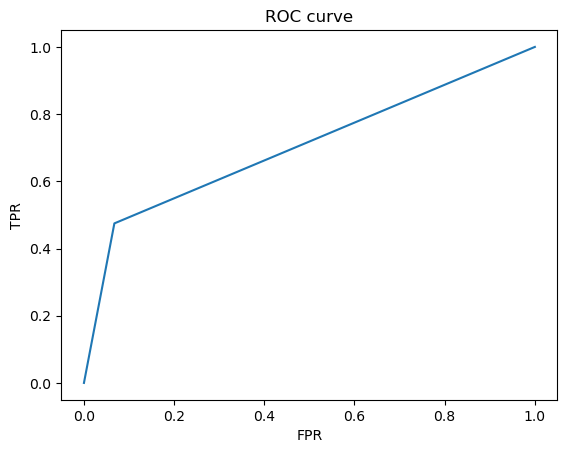

In [65]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Implementar treino com Support Vector Machines (SVM's)

Num passo seguinte, procedeu-se à tentativa do treino através de support vector machines.